### import some libraries and take a look a the data.  There are 2 files so first thing I need to do is combine the files.

In [3]:
import pandas as pd
import numpy as np
import json
import seaborn as sns

In [4]:
df1 = pd.read_csv('tmdb_5000_credits.csv')
df2 = pd.read_csv('tmdb_5000_movies.csv')

In [5]:
df1.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [6]:
print(df1['cast'][0:1])

0    [{"cast_id": 242, "character": "Jake Sully", "...
Name: cast, dtype: object


In [7]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [24]:
#looks like i'll need to change the movie_id column in the first df to match the 2nd

In [8]:
df1.columns = ['id', 'title', 'cast', 'crew']
df2 = df2.merge(df1, on = 'id')

In [9]:
df2.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,runtime,spoken_languages,status,tagline,title_x,vote_average,vote_count,title_y,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...",...,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...",...,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...",...,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]",...,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
#this added 2 title columns, so i can drop one. axis =1 to drop columns
df2 = df2.drop('title_y', axis=1)

In [11]:
df2.rename(columns={'title_x' : 'title'}, inplace=True) #rename title_x back to title

In [12]:
df2.head(1)

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [13]:
print(sorted(df2['runtime'] == 0))

[False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False, False

In [14]:
df2.isnull().sum()

budget                     0
genres                     0
homepage                3091
id                         0
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
cast                       0
crew                       0
dtype: int64

In [15]:
#I don't need the homepage column, so I'll go ahead and drop that from the dataset.
#There are also over 3000 null values for that column
df2 = df2.drop('homepage', axis=1)

In [32]:
# The genres, production companies, keywords, spoken languagues, cast and crew are Json format

In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline              

In [17]:
df2.describe()

,budget,id,popularity,revenue,runtime,vote_average,vote_count
count,4.803000e+03,4803.000000,4803.000000,4.803000e+03,4801.000000,4803.000000,4803.000000
mean,2.904504e+07,57165.484281,21.492301,8.226064e+07,106.875859,6.092172,690.217989
std,4.072239e+07,88694.614033,31.816650,1.628571e+08,22.611935,1.194612,1234.585891
min,0.000000e+00,5.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,7.900000e+05,9014.500000,4.668070,0.000000e+00,94.000000,5.600000,54.000000
50%,1.500000e+07,14629.000000,12.921594,1.917000e+07,103.000000,6.200000,235.000000
75%,4.000000e+07,58610.500000,28.313505,9.291719e+07,118.000000,6.800000,737.000000
max,3.800000e+08,459488.000000,875.581305,2.787965e+09,338.000000,10.000000,13752.000000


In [18]:
df2.isnull().sum()

budget                    0
genres                    0
id                        0
keywords                  0
original_language         0
original_title            0
overview                  3
popularity                0
production_companies      0
production_countries      0
release_date              1
revenue                   0
runtime                   2
spoken_languages          0
status                    0
tagline                 844
title                     0
vote_average              0
vote_count                0
cast                      0
crew                      0
dtype: int64

In [19]:
#mean vote score for all movies

mean_vote = df2['vote_average'].mean()
print(mean_vote)

6.092171559442011


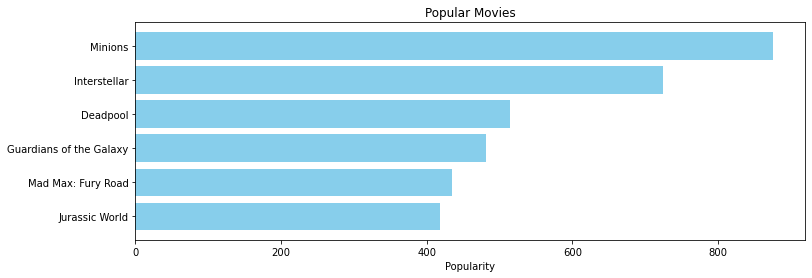

In [20]:
#a quick graph of popular movies:

pop= df2.sort_values('popularity', ascending=False)
import matplotlib.pyplot as plt
plt.figure(figsize=(12,4))

plt.barh(pop['title'].head(6),pop['popularity'].head(6), align='center',
        color='skyblue')
plt.gca().invert_yaxis()
plt.xlabel("Popularity")
plt.title("Popular Movies")
plt.show()

In [21]:
df2.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [22]:
# changing the genres column from json to string
df2['genres']=df2['genres'].apply(json.loads)
for index,i in zip(df2.index,df2['genres']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))# the key 'name' contains the name of the genre
    df2.loc[index,'genres']=str(list1)

In [23]:
#to make sure it worked
df2.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [24]:
#genre_dummies = pd.get_dummies(df2["genres"])

In [25]:
#change keywords column from json to string
df2['keywords']=df2['keywords'].apply(json.loads)
for index,i in zip(df2.index,df2['keywords']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    df2.loc[index,'keywords']=str(list1)

In [26]:
#change production companies from json to string
df2['production_companies']=df2['production_companies'].apply(json.loads)
for index,i in zip(df2.index,df2['production_companies']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    df2.loc[index,'production_companies']=str(list1)

In [27]:
#change production_countries from json to string
df2['production_countries']=df2['production_countries'].apply(json.loads)
for index,i in zip(df2.index,df2['production_countries']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    df2.loc[index,'production_countries']=str(list1)

In [28]:
df2.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",...,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."


In [29]:
#change spoken languages
df2['spoken_languages']=df2['spoken_languages'].apply(json.loads)
for index,i in zip(df2.index,df2['spoken_languages']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    df2.loc[index,'spoken_languages']=str(list1)

In [30]:
#change cast
df2['cast']=df2['cast'].apply(json.loads)
for index,i in zip(df2.index,df2['cast']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    df2.loc[index,'cast']=str(list1)

In [31]:
#change crew
df2['crew']=df2['crew'].apply(json.loads)
for index,i in zip(df2.index,df2['crew']):
    list1=[]
    for j in range(len(i)):
        list1.append((i[j]['name']))
    df2.loc[index,'crew']=str(list1)

In [32]:
df2.head()

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",...,2787965087,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","['Stephen E. Rivkin', 'Rick Carter', 'Christop..."
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,"['ocean', 'drug abuse', 'exotic island', 'east...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],...,961000000,169.0,['English'],Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500,"['Johnny Depp', 'Orlando Bloom', 'Keira Knight...","['Dariusz Wolski', 'Gore Verbinski', 'Jerry Br..."
2,245000000,"['Action', 'Adventure', 'Crime']",206647,"['spy', 'based on novel', 'secret agent', 'seq...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"['Columbia Pictures', 'Danjaq', 'B24']","['United Kingdom', 'United States of America']",...,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,A Plan No One Escapes,Spectre,6.3,4466,"['Daniel Craig', 'Christoph Waltz', 'Léa Seydo...","['Thomas Newman', 'Sam Mendes', 'Anna Pinnock'..."
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,"['dc comics', 'crime fighter', 'terrorist', 's...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"['Legendary Pictures', 'Warner Bros.', 'DC Ent...",['United States of America'],...,1084939099,165.0,['English'],Released,The Legend Ends,The Dark Knight Rises,7.6,9106,"['Christian Bale', 'Michael Caine', 'Gary Oldm...","['Hans Zimmer', 'Charles Roven', 'Christopher ..."
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,"['based on novel', 'mars', 'medallion', 'space...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,['Walt Disney Pictures'],['United States of America'],...,284139100,132.0,['English'],Released,"Lost in our world, found in another.",John Carter,6.1,2124,"['Taylor Kitsch', 'Lynn Collins', 'Samantha Mo...","['Andrew Stanton', 'Andrew Stanton', 'John Las..."


In [33]:
#looks like all json have been converted to lists
df2['genres']=df2['genres'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df2['genres']=df2['genres'].str.split(',')
#get the strings into a list.

In [31]:
df2.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",...,2787965087,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,"['Sam Worthington', 'Zoe Saldana', 'Sigourney ...","['Stephen E. Rivkin', 'Rick Carter', 'Christop..."


Lets look at the top genres now that the genre column is clean

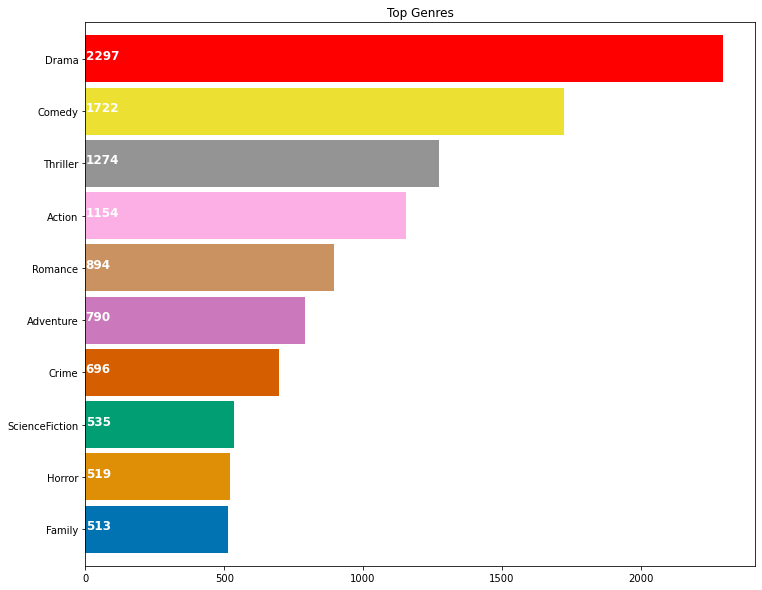

In [34]:
plt.subplots(figsize=(12,10))
list1=[]
for i in df2['genres']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('colorblind',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Genres')
plt.show()

In [35]:
genreList = []
for index, row in df2.iterrows():
    genres = row["genres"]
    
    for genre in genres:
        if genre not in genreList:
            genreList.append(genre)

In [36]:
genreList[:10]

['Action',
 'Adventure',
 'Fantasy',
 'ScienceFiction',
 'Crime',
 'Drama',
 'Thriller',
 'Animation',
 'Family',
 'Western']

In [37]:
#Use dummy variables to se each genre to a dummy variable
#genre_dummies = pd.get_dummies(df2["genres"])

In [38]:
#want to do the same but with Actors
df2['cast']=df2['cast'].str.strip('[]').str.replace(' ','').str.replace("'",'')
df2['cast']=df2['cast'].str.split(',')
#get the strings into a list.


In [39]:
df2.head(1)

,budget,genres,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,...,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count,cast,crew
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]",19995,"['culture clash', 'future', 'space war', 'spac...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",...,2787965087,162.0,"['English', 'Español']",Released,Enter the World of Pandora.,Avatar,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...","['Stephen E. Rivkin', 'Rick Carter', 'Christop..."


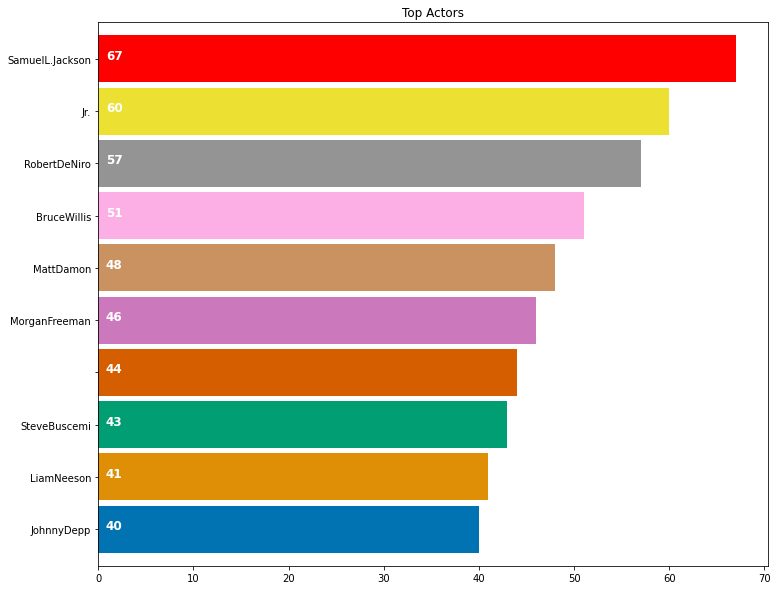

In [40]:
plt.subplots(figsize=(12,10))
list1=[]
for i in df2['cast']:
    list1.extend(i)
ax=pd.Series(list1).value_counts()[:10].sort_values(ascending=True).plot.barh(width=0.9,color=sns.color_palette('colorblind',10))
for i, v in enumerate(pd.Series(list1).value_counts()[:10].sort_values(ascending=True).values): 
    ax.text(.8, i, v,fontsize=12,color='white',weight='bold')
ax.patches[9].set_facecolor('r')
plt.title('Top Actors')
plt.show()

In [41]:
castList = []
for index, row in df2.iterrows():
    cast = row["cast"]
    
    for i in cast:
        if i not in castList:
            castList.append(i)

In [42]:
castList[:10]

['SamWorthington',
 'ZoeSaldana',
 'SigourneyWeaver',
 'StephenLang',
 'MichelleRodriguez',
 'GiovanniRibisi',
 'JoelDavidMoore',
 'CCHPounder',
 'WesStudi',
 'LazAlonso']

In [43]:
df2.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'cast', 'crew'],
      dtype='object')

In [44]:
df2.shape

(4803, 21)

In [45]:
#There are original titles, and english stringed titles - i suspect i don't need the original_title.
df2[df2['original_title'] != df2['title']][['title', 'original_title']].head()

,title,original_title
97,Shin Godzilla,シン・ゴジラ
215,Fantastic 4: Rise of the Silver Surfer,4: Rise of the Silver Surfer
235,Asterix at the Olympic Games,Astérix aux Jeux Olympiques
317,The Flowers of War,金陵十三釵
474,Evolution,Évolution


In [48]:
df2=df2.drop('original_title', axis=1)

In [49]:
#To see if column was dropped
df2.shape

(4803, 20)

In [50]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 0 to 4802
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   id                    4803 non-null   int64  
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   overview              4800 non-null   object 
 6   popularity            4803 non-null   float64
 7   production_companies  4803 non-null   object 
 8   production_countries  4803 non-null   object 
 9   release_date          4802 non-null   object 
 10  revenue               4803 non-null   int64  
 11  runtime               4801 non-null   float64
 12  spoken_languages      4803 non-null   object 
 13  status                4803 non-null   object 
 14  tagline               3959 non-null   object 
 15  title                

### Explore some more data:
    Lets look at the titles and the about sections to see if there is a set of words that are used more frequently.  Put this in a wordcloud!

In [51]:
#have to import the wordclouds library - use pip install wordcloud in terminal to add the library
from wordcloud import WordCloud, STOPWORDS

In [52]:
df2['title'] = df2['title'].astype('str')
df2['overview'] = df2['overview'].astype('str')

In [53]:
title_words = ' '.join(df2['title'])
overview_words = ' '.join(df2['overview'])

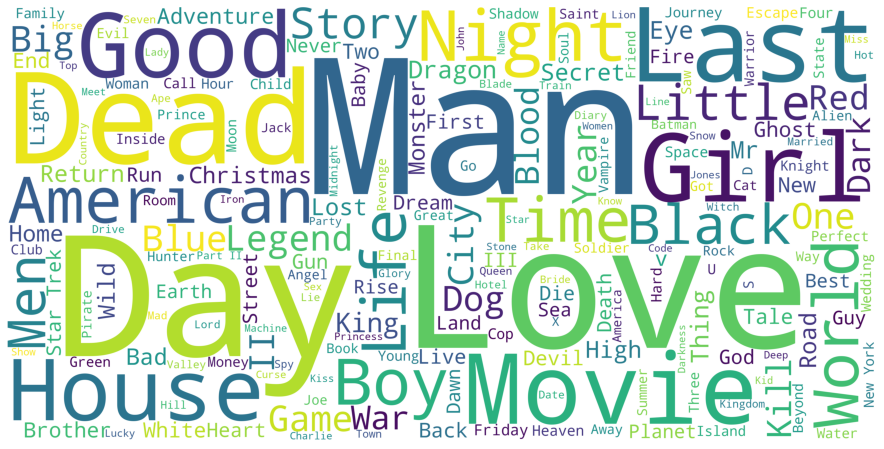

In [54]:
title_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(title_words)
plt.figure(figsize=(16,8))
plt.imshow(title_wordcloud)
plt.axis('off')
plt.show()

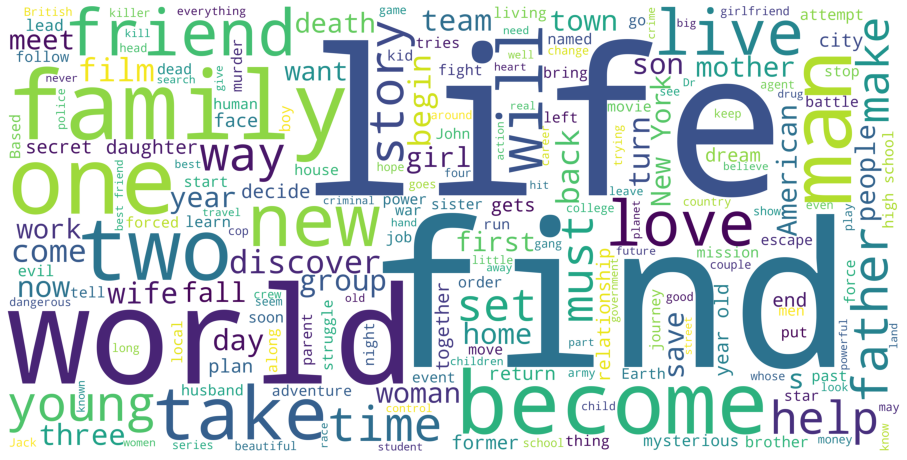

In [55]:
overview_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='white', height=2000, width=4000).generate(overview_words)
plt.figure(figsize=(16,18))
plt.imshow(overview_wordcloud)
plt.axis('off')
plt.show()

### Popularity, Vote Count and Vote Average

Look at the metrics from movies DB, and gain some better understanding on ratings and revenue/budget.

In [56]:
df2['popularity'].describe()

count    4803.000000
mean       21.492301
std        31.816650
min         0.000000
25%         4.668070
50%        12.921594
75%        28.313505
max       875.581305
Name: popularity, dtype: float64

/Users/chrispeterson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


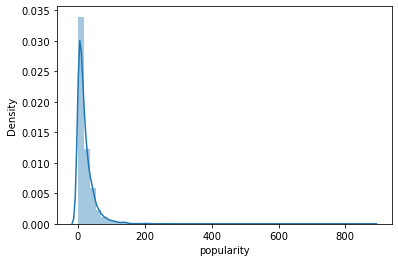

In [57]:
sns.distplot(df2['popularity'].fillna(df2['popularity'].median()))
plt.show()

<AxesSubplot:ylabel='Frequency'>

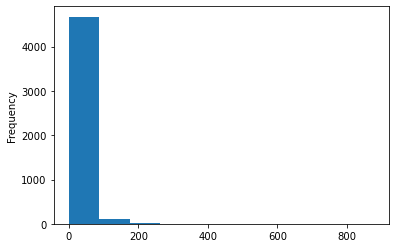

In [58]:
df2['popularity'].plot(kind='hist')

<AxesSubplot:ylabel='Frequency'>

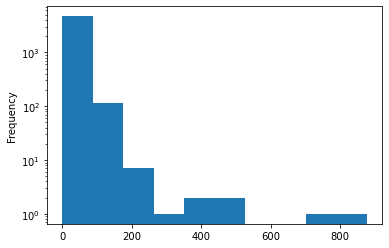

In [59]:
#add the logarithmic argument to actually see the 800+ popularity numbers
df2['popularity'].plot(logy=True, kind='hist')

In [60]:
df2[['title', 'popularity']].sort_values('popularity', ascending=False).head(10)

,title,popularity
546,Minions,875.581305
95,Interstellar,724.247784
788,Deadpool,514.569956
94,Guardians of the Galaxy,481.098624
127,Mad Max: Fury Road,434.278564
28,Jurassic World,418.708552
199,Pirates of the Caribbean: The Curse of the Bla...,271.972889
82,Dawn of the Planet of the Apes,243.791743
200,The Hunger Games: Mockingjay - Part 1,206.227151
88,Big Hero 6,203.734590


In [61]:
#lets check what we're really after - the least popular movies:
df2[['title', 'popularity']].sort_values('popularity', ascending=True).head(10)

,title,popularity
4553,America Is Still the Place,0.000000
3361,Alien Zone,0.000372
4727,Penitentiary,0.001117
4118,Hum To Mohabbat Karega,0.001186
4625,Midnight Cabaret,0.001389
4509,Love Letters,0.001586
4305,Down & Out With The Dolls,0.002386
4721,The Work and The Story,0.002388
4487,Hav Plenty,0.003142
4589,Fabled,0.003352


In [62]:
df2['vote_count'].describe()

count     4803.000000
mean       690.217989
std       1234.585891
min          0.000000
25%         54.000000
50%        235.000000
75%        737.000000
max      13752.000000
Name: vote_count, dtype: float64

/Users/chrispeterson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


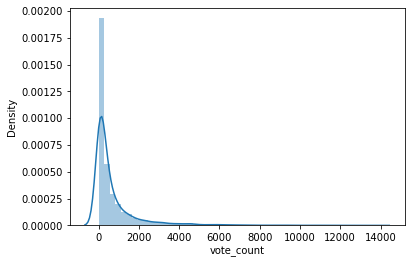

In [63]:
sns.distplot(df2['vote_count'].fillna(df2['vote_count'].median()))
plt.show()

<AxesSubplot:ylabel='Frequency'>

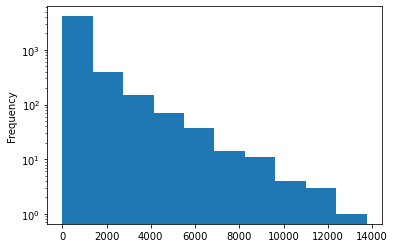

In [64]:
#add the logarithmic argument to actually see the 800+ popularity numbers
df2['vote_count'].plot(logy=True, kind='hist')

<AxesSubplot:ylabel='Frequency'>

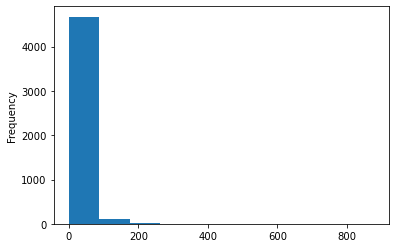

In [65]:
#add the logarithmic argument to actually see the 800+ popularity numbers
df2['popularity'].plot(kind='hist')

In [132]:
df2[['title', 'vote_count']].sort_values('vote_count', ascending=False).head(10)

,title,vote_count
96,Inception,13752
65,The Dark Knight,12002
0,Avatar,11800
16,The Avengers,11776
788,Deadpool,10995
95,Interstellar,10867
287,Django Unchained,10099
94,Guardians of the Galaxy,9742
426,The Hunger Games,9455
127,Mad Max: Fury Road,9427


In [66]:
#Thinking about the movies ^ it makes sense - both are Christopher Nolan movies and have a lot of hype around them.

In [67]:
df2[['title', 'vote_count']].sort_values('vote_count', ascending=True).head(10)

,title,vote_count
4307,Certifiably Jonathan,0
4140,"To Be Frank, Sinatra at 100",0
4638,Amidst the Devil's Wings,0
4118,Hum To Mohabbat Karega,0
4068,Sharkskin,0
4065,Mi America,0
4051,8 Days,0
4653,Rust,0
4657,UnDivided,0
4660,Give Me Shelter,0


In [68]:
df2['vote_average'] = df2['vote_average'].replace(0, np.nan)
df2['vote_average'].describe()

count    4740.000000
mean        6.173143
std         0.972684
min         0.500000
25%         5.600000
50%         6.200000
75%         6.800000
max        10.000000
Name: vote_average, dtype: float64

/Users/chrispeterson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='vote_average', ylabel='Density'>

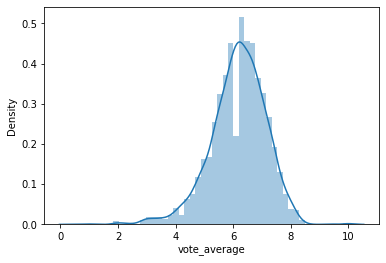

In [69]:
sns.distplot(df2['vote_average'].fillna(df2['vote_average'].median()))

According to this plot, the average of all ~5k movies is a 6 - I guess that reviewers don't just hand out 10/10 reviews.

In [70]:
#check out most critically acclaimed movies:
df2[df2['vote_count'] > 3000][['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False).head(10)

,title,vote_average,vote_count
1881,The Shawshank Redemption,8.5,8205
3337,The Godfather,8.4,5893
3865,Whiplash,8.3,4254
2294,Spirited Away,8.3,3840
1818,Schindler's List,8.3,4329
3232,Pulp Fiction,8.3,8428
662,Fight Club,8.3,9413
2731,The Godfather: Part II,8.3,3338
809,Forrest Gump,8.2,7927
690,The Green Mile,8.2,4048


In [71]:

df2[df2['vote_count'] < 2000][['title', 'vote_average', 'vote_count']].sort_values('vote_average', ascending=False).head(5)

#These must be movies that 1 person has voted on - and probably only one person has seen... :)


,title,vote_average,vote_count
3519,Stiff Upper Lips,10.0,1
4045,"Dancer, Texas Pop. 81",10.0,1
4247,Me You and Five Bucks,10.0,2
4662,Little Big Top,10.0,1
3992,Sardaarji,9.5,2


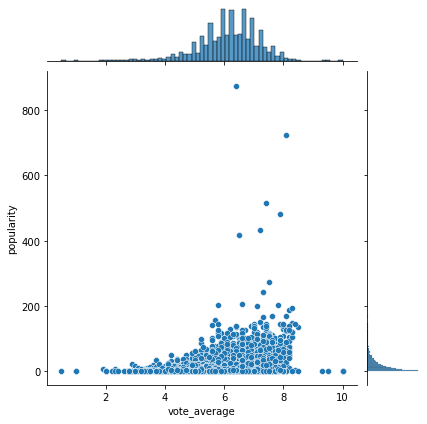

In [72]:
#Check for positive correlation between vote average and popularity
sns.jointplot(x='vote_average', y='popularity', data=df2)


Doesn't appear to be any correlation between vote average and popularity.  Lets check vote_average and vote count

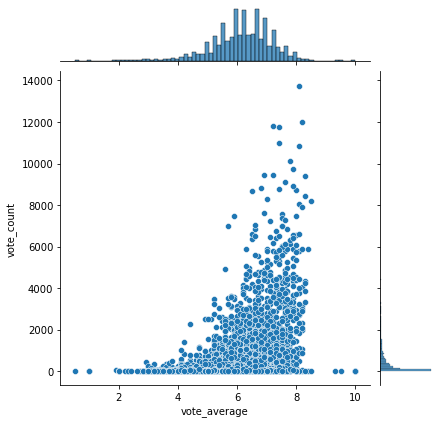

In [73]:
sns.jointplot(x='vote_average', y='vote_count', data=df2)

<AxesSubplot:xlabel='vote_average', ylabel='vote_count'>

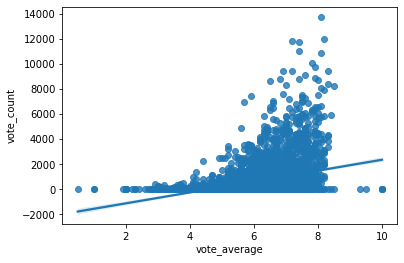

In [74]:
sns.regplot(x='vote_average', y='vote_count', data=df2)

This is more positively correlated, but not by much.

In [75]:
#lets look at budget stats
df2['budget'].describe()

count    4.803000e+03
mean     2.904504e+07
std      4.072239e+07
min      0.000000e+00
25%      7.900000e+05
50%      1.500000e+07
75%      4.000000e+07
max      3.800000e+08
Name: budget, dtype: float64

/Users/chrispeterson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='budget', ylabel='Density'>

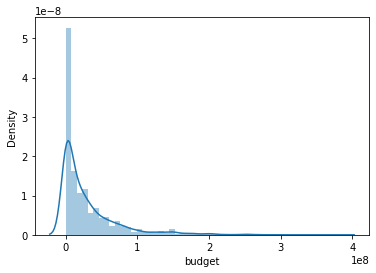

In [76]:
#plot it to visualize
sns.distplot(df2[df2['budget'].notnull()]['budget'])

<AxesSubplot:ylabel='Frequency'>

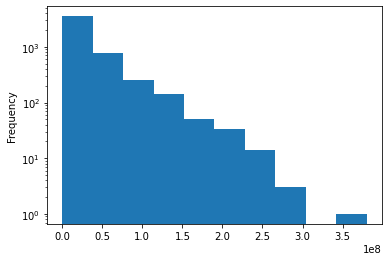

In [77]:
#I suspect there are more values in the higer numbers so lets log scale it
df2['budget'].plot(logy=True, kind='hist')

In [78]:
#lets look at the top 10 most expensive movies and generate what their return was
#need to create a return function for this though...

df2['return'] = df2['revenue'] / df2['budget']
df2[df2['return'].isnull()].shape



(890, 21)

In [79]:
df2[df2['budget'].notnull()][['title', 'budget', 'revenue', 'return']].sort_values('budget', ascending=False).head(10)


,title,budget,revenue,return
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,2.751878
1,Pirates of the Caribbean: At World's End,300000000,961000000,3.203333
7,Avengers: Age of Ultron,280000000,1405403694,5.019299
10,Superman Returns,270000000,391081192,1.448449
4,John Carter,260000000,284139100,1.092843
6,Tangled,260000000,591794936,2.276134
5,Spider-Man 3,258000000,890871626,3.452991
13,The Lone Ranger,255000000,89289910,0.350157
46,X-Men: Days of Future Past,250000000,747862775,2.991451
22,The Hobbit: The Desolation of Smaug,250000000,958400000,3.833600


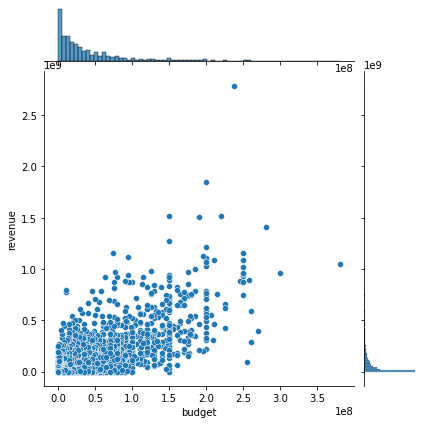

In [80]:
#check for correlation between budget and revenue:
sns.jointplot(x='budget',y='revenue', data=df2[df2['return'].notnull()])

<AxesSubplot:xlabel='budget', ylabel='revenue'>

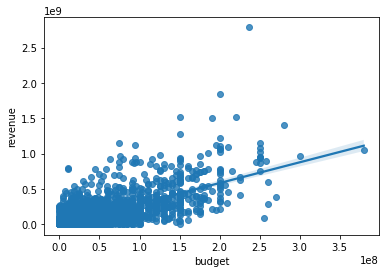

In [81]:
#add regression line to the chart
sns.regplot(x='budget', y='revenue', data=df2[df2['return'].notnull()])

#### This looks to have a fairly strong correlation!
It appears that a high budget film will most of the time resuly in a high revenue film as well.  Unless you make a movie like the Lone Ranger, where you have a .35 return - but this is an outlier in the data.

In [82]:
#now let's look at the revenue column

df2['revenue'].describe()

count    4.803000e+03
mean     8.226064e+07
std      1.628571e+08
min      0.000000e+00
25%      0.000000e+00
50%      1.917000e+07
75%      9.291719e+07
max      2.787965e+09
Name: revenue, dtype: float64

/Users/chrispeterson/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='revenue', ylabel='Density'>

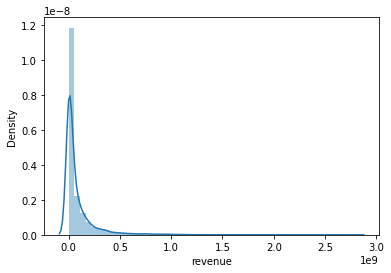

In [83]:
#again plot to visualize
sns.distplot(df2[df2['revenue'].notnull()]['revenue'])

<AxesSubplot:ylabel='Frequency'>

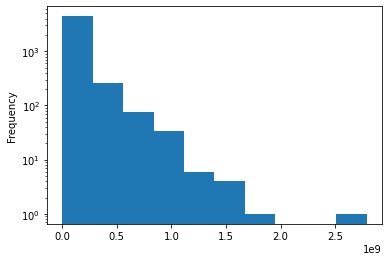

In [84]:
df2['revenue'].plot(logy=True, kind='hist')

In [85]:
#Highest Grossing
high_gross = df2[['title', 'budget', 'revenue']].sort_values('revenue', ascending=False).head(10)


In [86]:
#Top Returns of all time for this data set:
df2[(df2['return'].notnull()) & (df2['budget'] > 5000000)][['title', 'budget', 'revenue', 'return']].sort_values('return', ascending=False).head(10)



,title,budget,revenue,return
2967,E.T. the Extra-Terrestrial,10500000,792910554,75.515291
2912,Star Wars,11000000,775398007,70.490728
2809,Jaws,7000000,470654000,67.236286
2808,The Exorcist,8000000,441306145,55.163268
3696,Four Weddings and a Funeral,6000000,254700832,42.450139
3337,The Godfather,6000000,245066411,40.844402
3418,Annabelle,6500000,255273813,39.272894
3236,The Sound of Music,8200000,286214286,34.904181
2668,Pretty Woman,14000000,463000000,33.071429
3334,Juno,7500000,231411584,30.854878


In [87]:
#Worst movies on a revenue/return basis of all time:
df2[(df2['return'].notnull()) & (df2['budget'] > 5000000) & (df2['revenue'] > 10000)][['title', 'budget', 'revenue', 'return']].sort_values('return').head(10)


,title,budget,revenue,return
2901,5 Days of War,20000000,17479,0.000874
1101,Foodfight!,65000000,73706,0.001134
2651,The Good Night,15000000,20380,0.001359
2650,All The Queen's Men,15000000,23000,0.001533
3120,Strangerland,10000000,17472,0.001747
2714,Margaret,14000000,46495,0.003321
1672,1911,30000000,108348,0.003612
3115,"An Alan Smithee Film: Burn, Hollywood, Burn",10000000,45779,0.004578
3399,The Boondock Saints,6000000,30471,0.005078
2646,Silent Trigger,15000000,76382,0.005092


In [88]:
# I want to see the year of movies released:
df2['year'] = pd.to_datetime(df2['release_date'], errors='coerce').apply(lambda x: str(x).split('-')[0] if x != np.nan else np.nan)

In [89]:
#Lets now check the Top Returns of all time for this data set adding years:
df2[(df2['return'].notnull()) & (df2['budget'] > 5000000)][['title', 'budget', 'revenue', 'return', 'year']].sort_values('return', ascending=False).head(10)


,title,budget,revenue,return,year
2967,E.T. the Extra-Terrestrial,10500000,792910554,75.515291,1982
2912,Star Wars,11000000,775398007,70.490728,1977
2809,Jaws,7000000,470654000,67.236286,1975
2808,The Exorcist,8000000,441306145,55.163268,1973
3696,Four Weddings and a Funeral,6000000,254700832,42.450139,1994
3337,The Godfather,6000000,245066411,40.844402,1972
3418,Annabelle,6500000,255273813,39.272894,2014
3236,The Sound of Music,8200000,286214286,34.904181,1965
2668,Pretty Woman,14000000,463000000,33.071429,1990
3334,Juno,7500000,231411584,30.854878,2007


In [90]:
regresh = df2[df2['return'].notnull()]
regresh.shape

(3913, 22)

In [91]:
regresh.columns

Index(['budget', 'genres', 'id', 'keywords', 'original_language', 'overview',
       'popularity', 'production_companies', 'production_countries',
       'release_date', 'revenue', 'runtime', 'spoken_languages', 'status',
       'tagline', 'title', 'vote_average', 'vote_count', 'cast', 'crew',
       'return', 'year'],
      dtype='object')

In [92]:
regresh = regresh.drop(['id', 'release_date', 'status', 'tagline', 'return', 'crew'], axis=1)


In [93]:
regresh.head(2)

,budget,genres,keywords,original_language,overview,popularity,production_companies,production_countries,revenue,runtime,spoken_languages,title,vote_average,vote_count,cast,year
0,237000000,"[Action, Adventure, Fantasy, ScienceFiction]","['culture clash', 'future', 'space war', 'spac...",en,"In the 22nd century, a paraplegic Marine is di...",150.437577,"['Ingenious Film Partners', 'Twentieth Century...","['United States of America', 'United Kingdom']",2787965087,162.0,"['English', 'Español']",Avatar,7.2,11800,"[SamWorthington, ZoeSaldana, SigourneyWeaver, ...",2009
1,300000000,"[Adventure, Fantasy, Action]","['ocean', 'drug abuse', 'exotic island', 'east...",en,"Captain Barbossa, long believed to be dead, ha...",139.082615,"['Walt Disney Pictures', 'Jerry Bruckheimer Fi...",['United States of America'],961000000,169.0,['English'],Pirates of the Caribbean: At World's End,6.9,4500,"[JohnnyDepp, OrlandoBloom, KeiraKnightley, Ste...",2007


In [94]:
#recommend movies based on the plot?
df2['overview'].head()

0    In the 22nd century, a paraplegic Marine is di...
1    Captain Barbossa, long believed to be dead, ha...
2    A cryptic message from Bond’s past sends him o...
3    Following the death of District Attorney Harve...
4    John Carter is a war-weary, former military ca...
Name: overview, dtype: object

In [95]:
#Import TfIdfVectorizer from scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer

#Define a TF-IDF Vectorizer Object. Remove all english stop words.
tfidf = TfidfVectorizer(stop_words='english')

#Replace NaN with an empty string
df2['overview'] = df2['overview'].fillna('')

#Construct the required TF-IDF matrix by fitting and transforming the data
tfidf_matrix = tfidf.fit_transform(df2['overview'])

#Output the shape of tfidf_matrix
tfidf_matrix.shape

(4803, 20979)

In [96]:
# Import linear_kernel
from sklearn.metrics.pairwise import linear_kernel

# Compute the cosine similarity matrix
cosine_sim = linear_kernel(tfidf_matrix, tfidf_matrix)

In [97]:
#build a reverse map of indices and movie titles
indices = pd.Series(df2.index, index=df2['title']).drop_duplicates()

In [98]:
# Function that takes in movie title as input and outputs most similar movies
def get_recommendations(title, cosine_sim=cosine_sim):
    # Get the index of the movie that matches the title
    idx = indices[title]

    # Get the pairwsie similarity scores of all movies with that movie
    sim_scores = list(enumerate(cosine_sim[idx]))

    # Sort the movies based on the similarity scores
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get the scores of the 10 most similar movies
    sim_scores = sim_scores[1:11]

    # Get the movie indices
    movie_indices = [i[0] for i in sim_scores]

    # Return the top 10 most similar movies
    return df2['title'].iloc[movie_indices]

In [99]:
get_recommendations('Hot Rod')

1585    The Naked Gun 33⅓: The Final Insult
2219                       Everybody's Fine
2050               The Transporter Refueled
1513                          Transporter 2
1516                  Bringing Out the Dead
883                     Catch Me If You Can
902                           Jerry Maguire
4022                          Robot & Frank
2074                        The Transporter
3572                     The Lazarus Effect
Name: title, dtype: object

In [100]:
get_recommendations('The Equalizer')

3355                Devil's Due
1276           A Thousand Words
2564          Love & Basketball
4297     The Trouble with Harry
682               The Love Guru
2665                  Manderlay
2667           Fatal Attraction
3289    The Wendell Baker Story
4576                  Blue Ruin
1357                   Ip Man 3
Name: title, dtype: object

In [103]:
#Most expensive movies of all time:

df2[df2['budget'].notnull()][['title', 'budget', 'revenue', 'return', 'year']].sort_values('budget', ascending=False).head(10)

,title,budget,revenue,return,year
17,Pirates of the Caribbean: On Stranger Tides,380000000,1045713802,2.751878,2011
1,Pirates of the Caribbean: At World's End,300000000,961000000,3.203333,2007
7,Avengers: Age of Ultron,280000000,1405403694,5.019299,2015
10,Superman Returns,270000000,391081192,1.448449,2006
4,John Carter,260000000,284139100,1.092843,2012
6,Tangled,260000000,591794936,2.276134,2010
5,Spider-Man 3,258000000,890871626,3.452991,2007
13,The Lone Ranger,255000000,89289910,0.350157,2013
46,X-Men: Days of Future Past,250000000,747862775,2.991451,2014
22,The Hobbit: The Desolation of Smaug,250000000,958400000,3.833600,2013


In [119]:
get_recommendations('Avengers: Age of Ultron')

16                    The Avengers
79                      Iron Man 2
68                        Iron Man
26      Captain America: Civil War
227                 Knight and Day
31                      Iron Man 3
1868            Cradle 2 the Grave
344                    Unstoppable
1922                    Gettysburg
531        The Man from U.N.C.L.E.
Name: title, dtype: object